## Пояснение
Здесь рассматриваются только 1 сырое изображение и 3 метода.
Задача - после обработки всех изображений (в матрицы 1*4) проанализировать результаты (вручную - других вариантов нет)

Выводится "матрица изображений", далее вручную вводится ответ - четыре числа, каждое - оценка от 0 до 2.
Для сырого изображения - оценка насколько артефачная картинка, для остальных - насколько хорошо обработано изображение методом. Если первое из чисел -1 то оценка сохраняется и программа завершается. Если ввести 3 числа вместо 4, то программа остановится с ошибкой, но все равно сохранит результаты оценки в файл.

Предполагалось, что это будет использовано в работе, но это оказалось очень трудозатратно и оценка была довольно субъективной, поэтому я решил оставить эту задачу.

In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import glob
import json

import time
from IPython.display import clear_output

In [2]:
json_path = 'data/processed/analyzed_images.json'

processed_images_path = 'data/processed/*'
images = glob.glob(processed_images_path)

# эти строки нужны, чтобы если уже есть прогресс анализа изображений,
# подгрузить сохраненные результаты и продолжить

try:
    with open(json_path) as json_file:
        answers = json.load(json_file)
except FileNotFoundError:
    answers = {}

  0%|          | 0/1 [00:00<?, ?it/s]

data/processed\3155.png


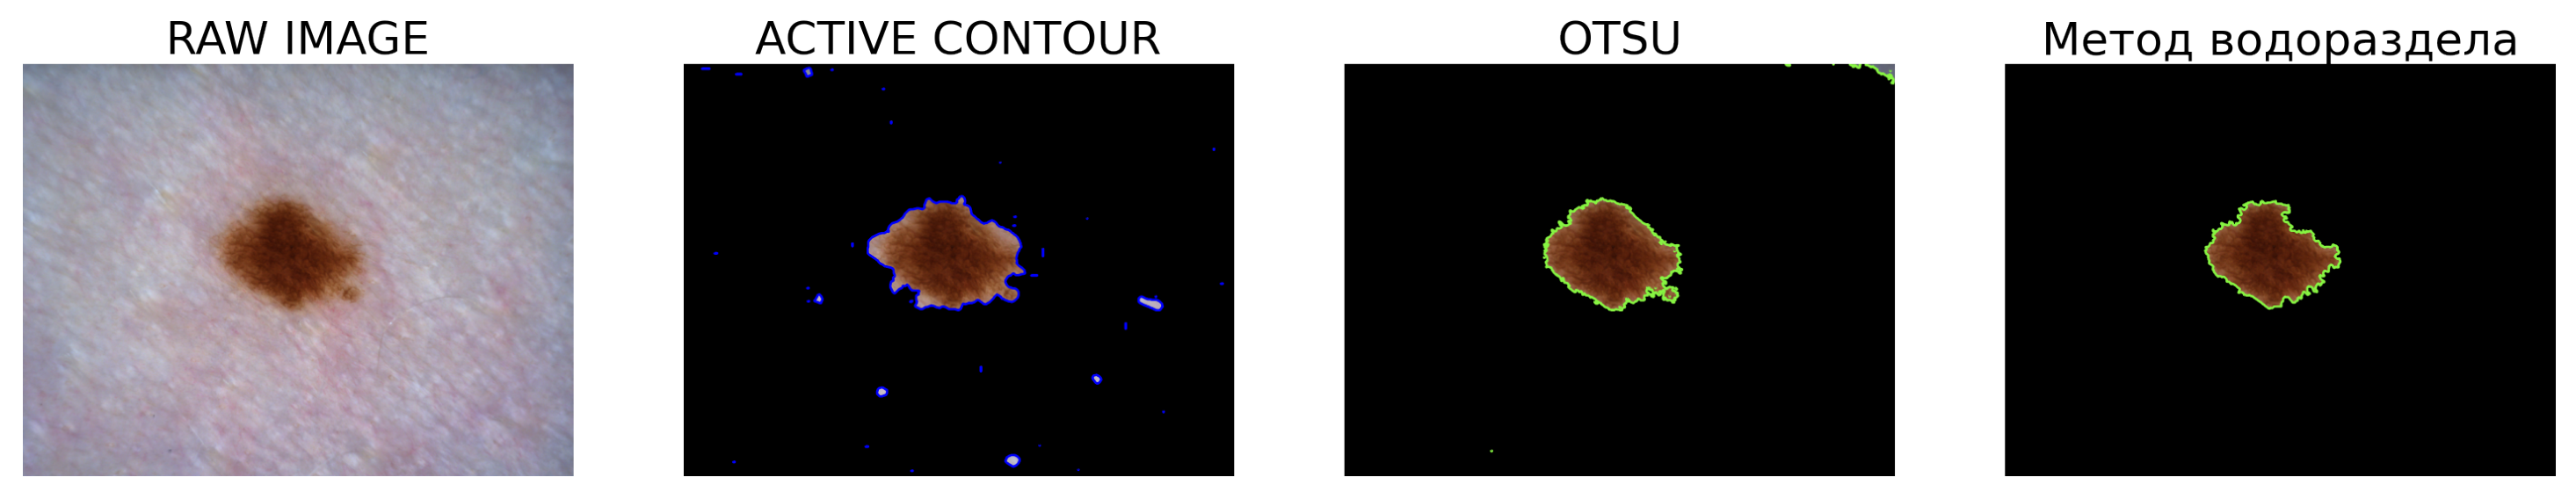

2 2 2 2 


In [3]:
file_already_saved = False
try:
    for image_path in tqdm(images):
        if image_path in answers or image_path.endswith('.json'):
            continue

        print(image_path)
        fig, ax = plt.subplots(1, 1, figsize=(30, 10), dpi=125)
        image = plt.imread(image_path)
        ax.imshow(image)
        ax.set_axis_off()
        plt.show()
        first_image_rate, second_image_rate, third_image_rate, forth_image_rate = map(int, input().split())
        if first_image_rate == -1:
            with open(json_path, 'w') as json_file:
                json.dump(answers, json_file)
            file_already_saved = True
            break
        answers[image_path] = (first_image_rate, second_image_rate, third_image_rate, forth_image_rate)
        # эти строки нужны если нужно просматривать много изоюражений, 
        # для примера я решил ограничится одним и не стирать его из вывода
#         plt.figure().clear()
#         plt.close()
#         plt.cla()
#         plt.clf()
#         clear_output()
except Exception as ex:
    print(ex)
finally:
    if not file_already_saved:
        with open(json_path, 'w') as json_file:
            json.dump(answers, json_file)